In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,OneHotEncoder,FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression   
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"train (1).csv",usecols=['Age','Fare','Survived'])

In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [5]:
df.sample(5)

,Survived,Age,Fare
495,0,29.699118,14.4583
621,1,42.000000,52.5542
574,0,16.000000,8.0500
849,1,29.699118,89.1042
434,0,50.000000,55.9000


In [6]:
X= df.drop(columns=['Survived'])
Y = df['Survived']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [7]:
x_train.shape ,x_test.shape

((712, 2), (179, 2))

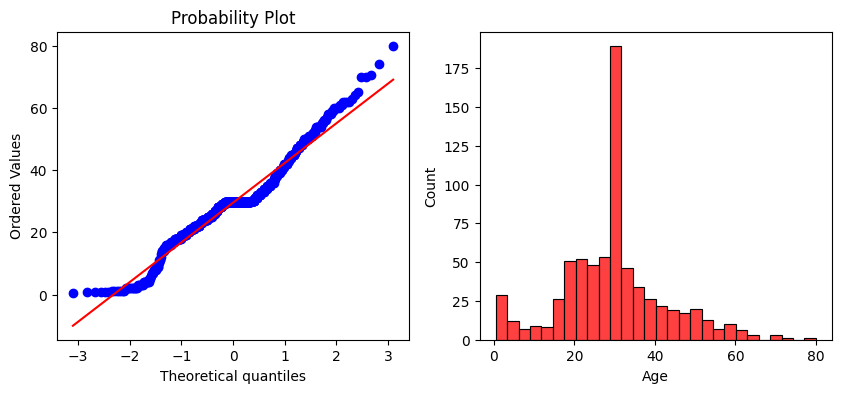

In [8]:

fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(10,4))

stats.probplot(x_train['Age'],plot=ax1)
sns.histplot(x_train['Age'],color='Red')
plt.show()

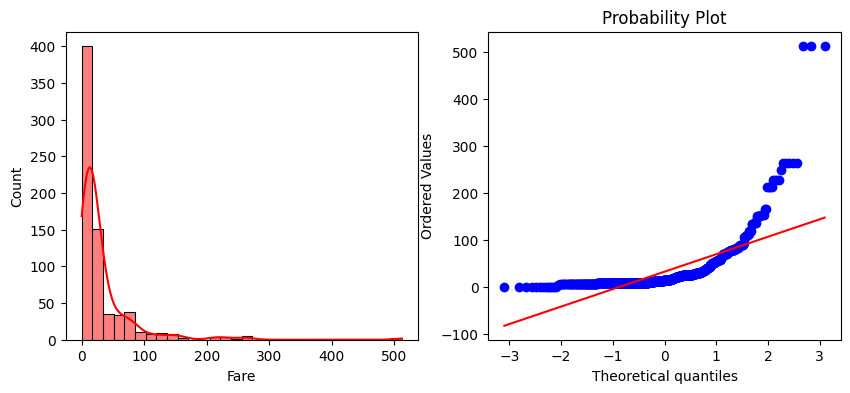

In [9]:

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))
sns.histplot(x_train['Fare'],kde=True,color='red',bins=30,ax=ax1)
stats.probplot(x_train['Fare'],dist='norm',plot=ax2)
plt.show()

In [10]:
alg1 = DecisionTreeClassifier()
alg2= LogisticRegression()

In [11]:
alg1.fit(x_train,y_train)
alg2.fit(x_train,y_train)

Y_pred1 = alg2.predict(x_test)
Y_pred2=alg2.predict(x_test)

print("Decison",accuracy_score(y_test,Y_pred1))
print("Logistic",accuracy_score(y_test,Y_pred2))

Decison 0.6480446927374302
Logistic 0.6480446927374302


#### functional transformer

In [12]:
function = FunctionTransformer(func=np.log1p)

In [13]:


al= LogisticRegression()
all= DecisionTreeClassifier()

x_train_transform = function.fit_transform(x_train)
x_test_transform = function.transform(x_test)


al.fit(x_train_transform,y_train)
all.fit(x_train_transform,y_train)


y_pred12 = al.predict(x_test_transform)
y_pred22 = all.predict(x_test_transform)

In [14]:
print("lr ", accuracy_score(y_test,y_pred12))

lr  0.6815642458100558


In [15]:
print("decision",accuracy_score(y_test,y_pred22))

decision 0.6703910614525139


#### cross validation

In [16]:
x_transform= function.fit_transform(X)

lr = LogisticRegression()
de= DecisionTreeClassifier()

print("lr" , np.mean(cross_val_score(lr,x_transform,Y,scoring='accuracy',cv=10)))

print("de" , np.mean(cross_val_score(de,x_transform,Y,scoring='accuracy',cv=10)))

lr 0.678027465667915
de 0.656629213483146


#### before and after fare transform 

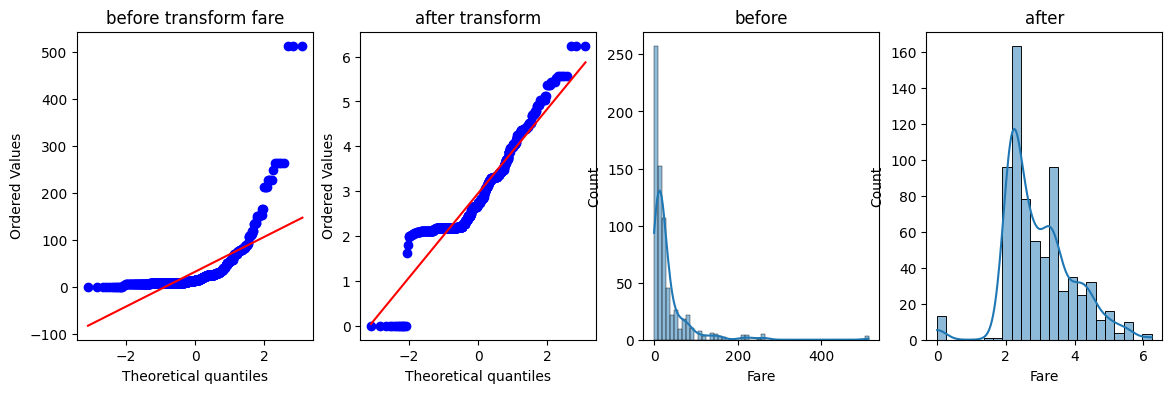

In [17]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(14,4))

stats.probplot(x_train['Fare'],dist='norm',plot=ax1)
ax1.set_title("before transform fare")

stats.probplot(x_train_transform['Fare'],dist='norm',plot=ax2)
ax2.set_title("after transform")
sns.histplot(x_train['Fare'],kde=True,ax=ax3)
ax3.set_title("before")
sns.histplot(x_train_transform['Fare'],kde=True,ax=ax4)
ax4.set_title("after")
plt.show()


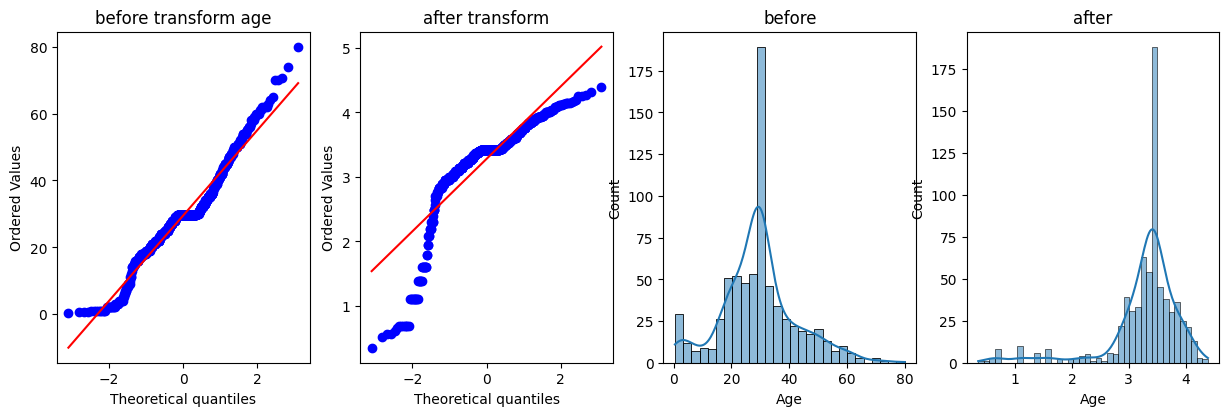

In [18]:
fig, (ax1,ax2,ax3,ax4)= plt.subplots(ncols=4,figsize=(15,4.3))
stats.probplot(x_train['Age'],dist='norm',plot=ax1)
ax1.set_title("before transform age")

stats.probplot(x_train_transform['Age'],dist='norm',plot=ax2)
ax2.set_title("after transform")
sns.histplot(x_train['Age'],kde=True,ax=ax3)
ax3.set_title("before")
sns.histplot(x_train_transform['Age'],kde=True,ax=ax4)
ax4.set_title("after")
plt.show()

#### instead of applying both apply only on fare

In [19]:
func2= ColumnTransformer([
    
    ('log',FunctionTransformer(func=np.log1p),['Fare'])
    ],remainder='passthrough')

In [20]:
lr= LogisticRegression()
de=DecisionTreeClassifier()


x_train_transform2 = func2.fit_transform(x_train)
x_test_transform2 = func2.transform(x_test)

lr.fit(x_train_transform2,y_train)
de.fit(x_train_transform2,y_train)


y_p= lr.predict(x_test_transform2)
y_p2 = de.predict(x_test_transform2)

print("lr" ,accuracy_score(y_p,y_test))
print("de",accuracy_score(y_p2,y_test))

lr 0.6703910614525139
de 0.659217877094972


#### again cross validation 

In [21]:
x_transform= function.fit_transform(X)

lr = LogisticRegression()
de= DecisionTreeClassifier()

print("lr" , np.mean(cross_val_score(lr,x_transform,Y,scoring='accuracy',cv=10)))

print("de" , np.mean(cross_val_score(de,x_transform,Y,scoring='accuracy',cv=10)))

lr 0.678027465667915
de 0.6588888888888889


#### function to write everything in one 

In [22]:
def fun(trans):
 X = df.iloc[:,1:3]
 Y=df.iloc[:,0]    
 
 function= ColumnTransformer([ ('log',FunctionTransformer(function=np.log1p),['Fare'])],remainder='passthrough')
 
 x_transform= function.fit_transform(X)
 
 lr = LogisticRegression()
 
 
 print("accuracy of lr :=",np.mean(cross_val_score(lr,x_transform,y,scoring='accuracy',cv=10))  )   
 
 
 fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(13,5))
 stats.probplot(X['Fare'],dist='norm',plot=ax1)
 plt.show()
 ax1.set_title("before")
 
 stats.probplot(x_transform['Fare'],dist='norm',plot=ax2)
 plt.show()
 ax2.set_title("after")
 
 

accuracy of lr :=  0.6690137328339575


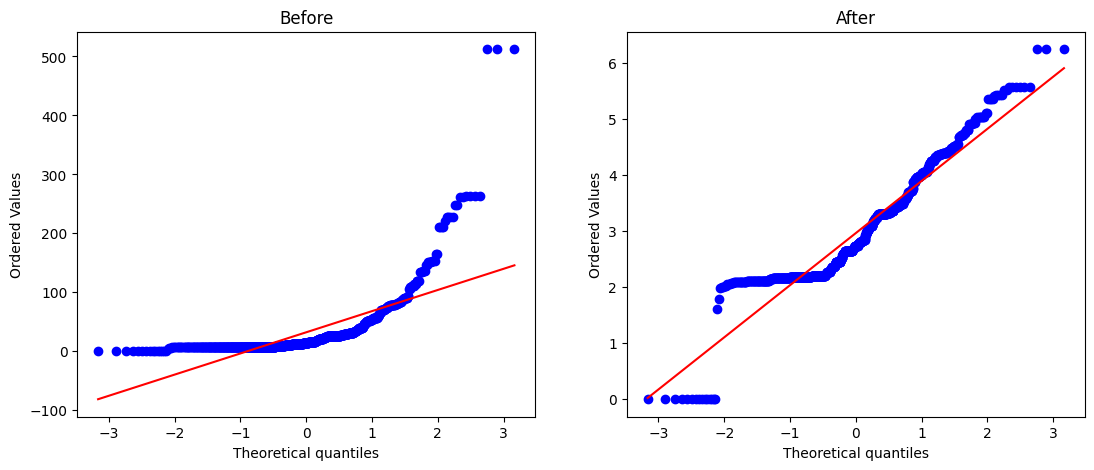

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def fun(df):
    # Split features and target
    X= df[['Fare']]
    Y=df[['Survived']]
    
    
    # Transform 'Fare' with log1p
    function = ColumnTransformer(
        [('log', FunctionTransformer(np.log1p), ['Fare'])],
        remainder='passthrough'
    )
    
    x_transform = function.fit_transform(X)
    
    # Model
    lr = LogisticRegression(max_iter=1000)
    print("accuracy of lr := ", 
          np.mean(cross_val_score(lr, x_transform, Y, scoring='accuracy', cv=10)))
    
    # Plot before vs after
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5))
    
    stats.probplot(X['Fare'], dist="norm", plot=ax1)
    ax1.set_title("Before")
    
    # After: 'Fare' becomes column 0 after transformation
    stats.probplot(x_transform[:, 0], dist="norm", plot=ax2)
    ax2.set_title("After")
    
    plt.show()


fun(df)